In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("labeled_data.csv")
df.head(20)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1574 non-null   int64 
 1   tweet   1574 non-null   object
dtypes: int64(1), object(1)
memory usage: 24.7+ KB


Text(0.5, 1.0, 'Hate Speech Rates')

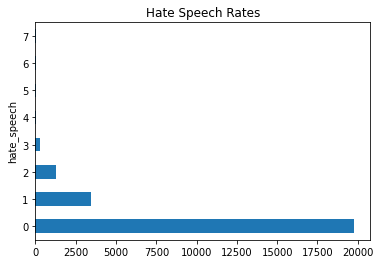

In [37]:
df["hate_speech"].value_counts().plot.barh().set_title("Hate Speech Rates")

In [38]:
value_to_match = 2

# Use boolean indexing to filter the DataFrame
filtered_df = df[df['hate_speech'] >= value_to_match]

# Print the filtered column
print(filtered_df['hate_speech'].info)

<bound method Series.info of 85       2
89       3
110      3
184      3
202      2
        ..
24705    2
24729    2
24751    2
24776    3
24777    2
Name: hate_speech, Length: 1574, dtype: int64>


In [39]:
from sklearn.utils import shuffle

filtered_df.reset_index(drop=True, inplace=True)

df = shuffle(filtered_df, random_state=42)

df.reset_index(drop=True, inplace=True)

df = df.drop("Unnamed: 0",axis = 1)
df = df.drop("count",axis = 1)
df = df.drop("offensive_language",axis = 1)
df = df.drop("neither",axis = 1)
df = df.drop("class", axis = 1)

df["hate_speech"] = 1

df.rename(columns={'hate_speech': "label"}, inplace=True)

df.head()

,label,tweet
0,1,RT @InfidelAlie: Yay for America &amp; Israel....
1,1,Happy birthday to this coon ass nigga buckcity...
2,1,RT @NYTMinusContext: kill whitey
3,1,@jayswaggkillah Is a fag
4,1,@gezus__ @MANIAC3X @bam00se @Woody_AFC mean br...


In [40]:
df.head(10)

,label,tweet
0,1,RT @InfidelAlie: Yay for America &amp; Israel....
1,1,Happy birthday to this coon ass nigga buckcity...
2,1,RT @NYTMinusContext: kill whitey
3,1,@jayswaggkillah Is a fag
4,1,@gezus__ @MANIAC3X @bam00se @Woody_AFC mean br...
5,1,fat dykes make me want to vomit
6,1,@heyrmbr probs that fag Vhia
7,1,@JimBoberson happy birthday faggot
8,1,@denytheprophecy thanks for ignoring my texts fag
9,1,"&#8220;@FunnyPicsDepot: ""fucking white people""..."


In [41]:
df.isna().isna().sum()

label    0
tweet    0
dtype: int64

In [42]:
type(df.iloc[0].tweet) # Lets check out.

str

In [30]:
file_path = 'hate_speech.csv'

# Save the modified DataFrame as a CSV file
df.to_csv(file_path, index=False)